In [ ]:

import tensorflow as tf
keras = tf.keras
from keras import losses, layers, models, metrics, optimizers
from matplotlib import pyplot as plt


data = tf.keras.datasets.mnist.load_data(
    path='mnist.npz'
)

train, test = data

train_data, train_labels = train
test_data, test_labels = test
#transform to binary vector of dimension 10
train_labels = tf.one_hot(train_labels, 10)
test_labels = tf.one_hot(test_labels, 10)

# create network
network = models.Sequential([
    #layers.Normalization(input_shape=(28, 28, 1)),
    layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (1,1), activation='relu'),
    layers.Flatten(),
    layers.Dropout(0.5),
    layers.Dense(64, activation='relu'),
    layers.Dropout(0.2),
    layers.Dense(10, activation='softmax')
])


network.compile(loss = losses.CategoricalCrossentropy(), metrics=[metrics.CategoricalAccuracy()], optimizer=optimizers.Adam())

training = network.fit(train_data, train_labels, epochs=20, batch_size=128, validation_data=(test_data, test_labels))

Epoch 1/20
469/469 [==============================] - 3s 4ms/step - loss: 2.7431 - categorical_accuracy: 0.8664 - val_loss: 0.6793 - val_categorical_accuracy: 0.9191
Epoch 2/20
469/469 [==============================] - 2s 4ms/step - loss: 0.5156 - categorical_accuracy: 0.9300 - val_loss: 0.4788 - val_categorical_accuracy: 0.9338
Epoch 3/20
469/469 [==============================] - 2s 4ms/step - loss: 0.2928 - categorical_accuracy: 0.9475 - val_loss: 0.3682 - val_categorical_accuracy: 0.9394
Epoch 4/20
469/469 [==============================] - 2s 3ms/step - loss: 0.2057 - categorical_accuracy: 0.9587 - val_loss: 0.3160 - val_categorical_accuracy: 0.9467
Epoch 5/20
469/469 [==============================] - 2s 3ms/step - loss: 0.1698 - categorical_accuracy: 0.9626 - val_loss: 0.2974 - val_categorical_accuracy: 0.9501
Epoch 6/20
469/469 [==============================] - 1s 3ms/step - loss: 0.1470 - categorical_accuracy: 0.9660 - val_loss: 0.3253 - val_categorical_accuracy: 0.9465
Epoc

Plotten der Lernkurve

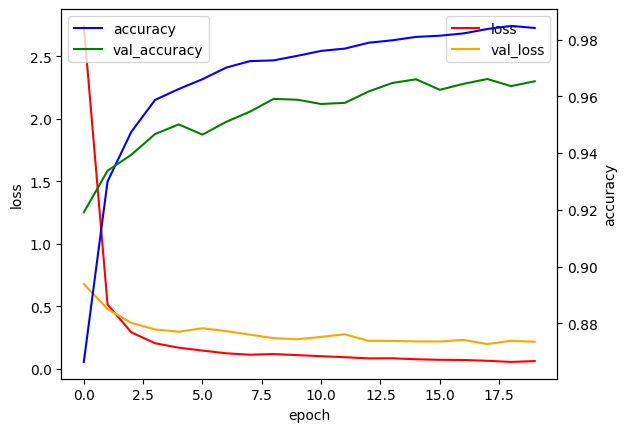

In [14]:
# show loss and accuracy in twin x plots
fig, ax1 = plt.subplots()
ax2 = ax1.twinx()
ax1.plot(training.history['loss'], label='loss', color='red')
ax1.plot(training.history['val_loss'], label='val_loss', color='orange')
ax1.set_xlabel('epoch')
ax1.set_ylabel('loss')
ax1.legend()
ax2.plot(training.history['categorical_accuracy'], label='accuracy', color='blue')	
ax2.plot(training.history['val_categorical_accuracy'], label='val_accuracy', color='green')
ax2.set_ylabel('accuracy')
ax2.legend()
plt.show()

Anwenden auf eigenes Bild

In [ ]:
# import libraries

import skimage
import numpy as np
import matplotlib.pyplot as plt
from skimage import filters, morphology, measure, feature, draw
import matplotlib.pyplot as plt
from support.bounding_boxes import draw_bounding_boxes, create_bounding_boxes
# capture image with picam2
from picamera2 import Picamera2
camera = Picamera2()

In [ ]:
camera.start()
image = camera.capture_array()
camera.stop()
# take green channel
img = image[:,:,1]
plt.imshow(image, cmap='gray')
plt.show()

In [10]:
import skimage
img = skimage.io.imread('images/Numbers.jpg', as_gray=True)
#scale image to 300 x 300
img = skimage.transform.resize(img, (300, 300))

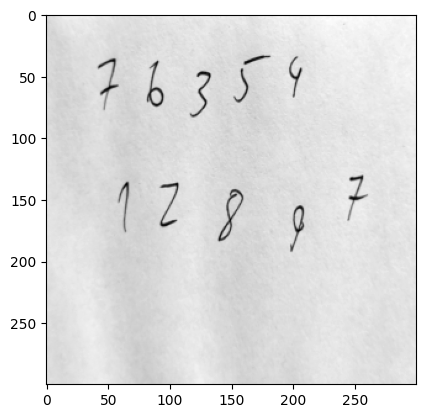

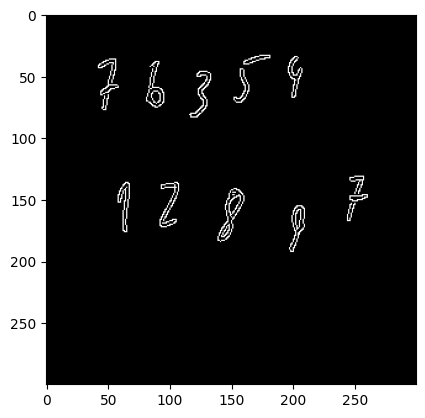

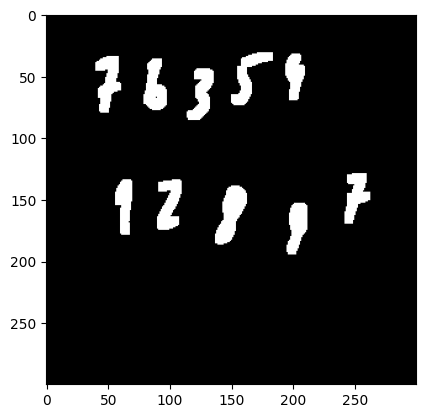

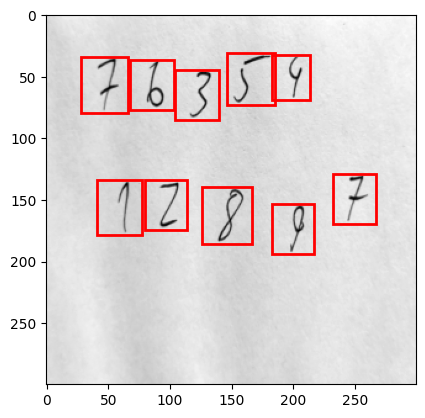

6
4
3
8
8
3
3
3
5
9


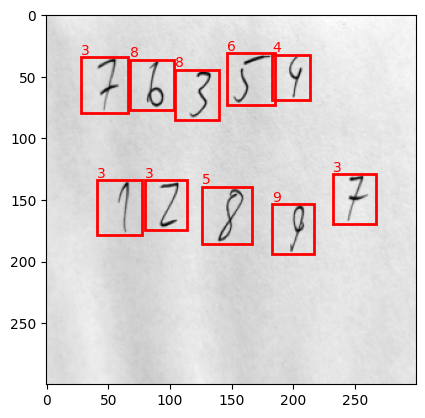

In [15]:
import skimage
from support.bounding_boxes import create_bounding_boxes, draw_bounding_boxes
import numpy as np


plt.imshow(img, cmap='gray')
plt.show()

# do canny edge
edges = skimage.feature.canny(img, sigma=1)
plt.imshow(edges, cmap='gray')
plt.show()

# erosion
edges = skimage.morphology.binary_dilation(edges, footprint=np.ones((5,5)))
plt.imshow(edges, cmap='gray')
plt.show()

#label image
labels = skimage.measure.label(edges)

# create bounding boxes
rectangles = create_bounding_boxes(labels, square = True)
plt.imshow(img, cmap='gray')
draw_bounding_boxes(rectangles)
plt.show()
assigned_classes = []

# create bounding boxes with score
for rect in rectangles:
    x, y, w, h = rect
    # extract patch for rectangle
    patch = img[y:y+h, x:x+w]
    # resize patch to required size
    patch = skimage.transform.resize(patch, (28, 28))
    # invert colors
    patch = 1. - patch
    patch = np.where(patch < 0.5, 0, patch * 2 - 0.5)
    # get the network output for the patch
    output = network(tf.expand_dims(patch * 255, 0))
    # get the predicted class
    label = np.argmax(output[0])
    print(label)
    assigned_classes.append(label)

plt.imshow(img, cmap='gray')
draw_bounding_boxes(rectangles, assigned_classes)
plt.show()